In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import time

In [10]:
API_KEY = "2ea642a9bd680c37d5297d61571d0010"  # Replace with your API key
CITY = "Mumbai"
URL = f"http://api.openweathermap.org/data/2.5/weather?q={CITY}&appid={API_KEY}&units=metric"

In [11]:
# Create empty lists to store data
timestamps = []
temperatures = []
humidities = []
weather_conditions = []

In [12]:
# Function to fetch real-time weather data
def fetch_weather():
    response = requests.get(URL)
    data = response.json()
    timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    temp = data['main']['temp']
    humidity = data['main']['humidity']
    condition = data['weather'][0]['main']
    return timestamp, temp, humidity, condition

In [13]:
print("Collecting data...\n")

In [14]:
for i in range(10):
    timestamp, temp, humidity, condition = fetch_weather()
    print(f"[{timestamp}] Temp: {temp}°C, Humidity: {humidity}%, Condition: {condition}")
    timestamps.append(timestamp)
    temperatures.append(temp)
    humidities.append(humidity)
    weather_conditions.append(condition)
    time.sleep(1)  # Wait for 30 seconds before next fetch

[2025-07-26 02:02:06] Temp: 27.04°C, Humidity: 86%, Condition: Clouds
[2025-07-26 02:02:07] Temp: 27.04°C, Humidity: 86%, Condition: Clouds
[2025-07-26 02:02:08] Temp: 27.04°C, Humidity: 86%, Condition: Clouds
[2025-07-26 02:02:09] Temp: 27.04°C, Humidity: 86%, Condition: Clouds
[2025-07-26 02:02:10] Temp: 27.04°C, Humidity: 86%, Condition: Clouds
[2025-07-26 02:02:11] Temp: 27.04°C, Humidity: 86%, Condition: Clouds
[2025-07-26 02:02:13] Temp: 27.04°C, Humidity: 86%, Condition: Clouds
[2025-07-26 02:02:14] Temp: 27.04°C, Humidity: 86%, Condition: Clouds
[2025-07-26 02:02:15] Temp: 27.04°C, Humidity: 86%, Condition: Clouds
[2025-07-26 02:02:16] Temp: 27.04°C, Humidity: 86%, Condition: Clouds


In [15]:
df = pd.DataFrame({
    "Timestamp": timestamps,
    "Temperature (C)": temperatures,
    "Humidity (%)": humidities,
    "Condition": weather_conditions
})


In [16]:
df.to_csv("realtime_weather_data.csv", index=False)
print("\nData saved to realtime_weather_data.csv")


Data saved to realtime_weather_data.csv


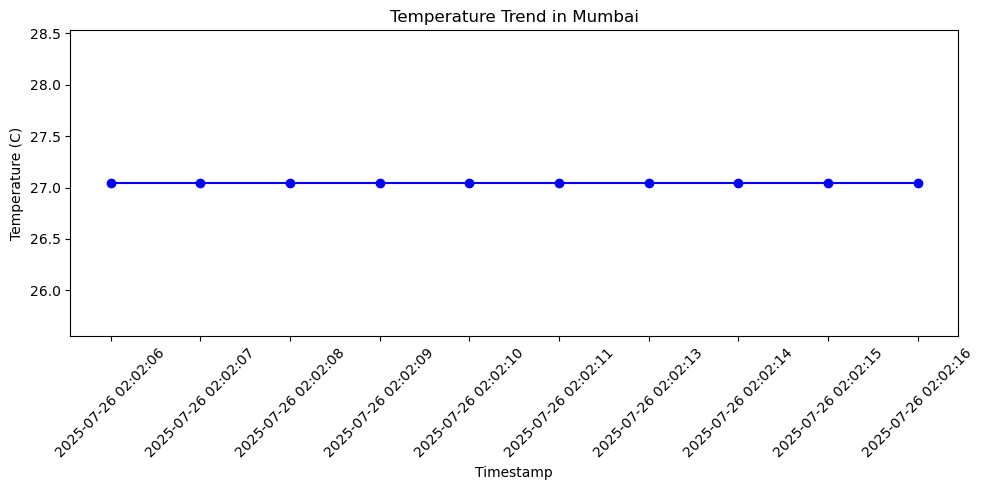

In [17]:
plt.figure(figsize=(10, 5))
plt.plot(df['Timestamp'], df['Temperature (C)'], marker='o', color='blue')
plt.xticks(rotation=45)
plt.title(f"Temperature Trend in {CITY}")
plt.xlabel("Timestamp")
plt.ylabel("Temperature (C)")
plt.tight_layout()
plt.show()